Please fill this part


*   Full Name: Geon Kim
*   Student Number: 218831214

Change file name to yourlast name followed by studentID in the following format and then submit LASTNAME_STUDENTID.ipynb.

Install profiling
https://github.com/ydataai/ydata-profiling

In [1]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions



To initiate a session restart, go to Runtime > Restart Session. Occasionally, the impact of installed libraries may not be visible until a restart is performed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Data Transfer: Moving Data from Google Drive to the Current Directory ( 5 pt)
In this section, we will transfer data from Google Drive to the current working directory and Unzip it. Let's assume that the data is located in "/content/drive/MyDrive/HW2/HW2_Data.zip".

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
################################################################################
## TODO: Use Linux command to transfer and unzip data
################################################################################
# zip file location should be :  "/content/drive/MyDrive/HW2/HW2_Data.zip"
# destination directory for unzipping should be  =>  "/content/"

!cp /content/drive/MyDrive/HW2/HW2_Data.zip /content/
!unzip -o /content/HW2_Data.zip -d /content/


Archive:  /content/HW2_Data.zip
  inflating: /content/Dataset_Description.pdf  
  inflating: /content/Heart_Disease_Dataset.csv  


## Load Data ( 5 pt)
load data in pandas dataframe

In [5]:
################################################################################
## TODO: load and display dataframe
################################################################################

df = pd.read_csv('/content/Heart_Disease_Dataset.csv')
df


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Explore data by ProfileReport ( 5 pt)
https://github.com/ydataai/ydata-profiling

Just simply run ProfileReport in 2 lines

In [6]:
################################################################################
## TODO: Use profiler in 2 line and explore the data
################################################################################

profile = ProfileReport(df, title="Profiling report")
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Explore data by Panda ( 5pt )

---------shape---------
(1190, 12)
---------missing entries----------
no missing entries
---------# of positive and negative---------
number of positive cases: 722
number of negative cases: 13
--------------------- Plots --------------------------


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>]],
      dtype=object)

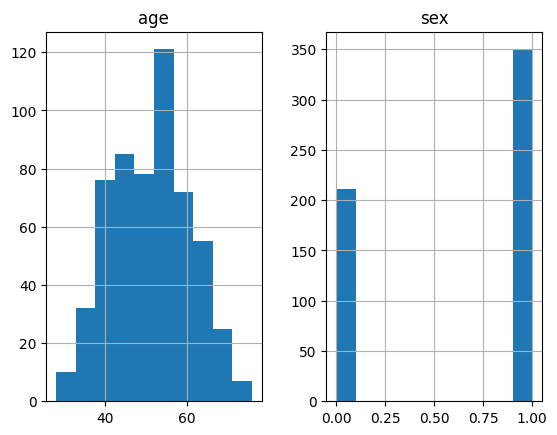

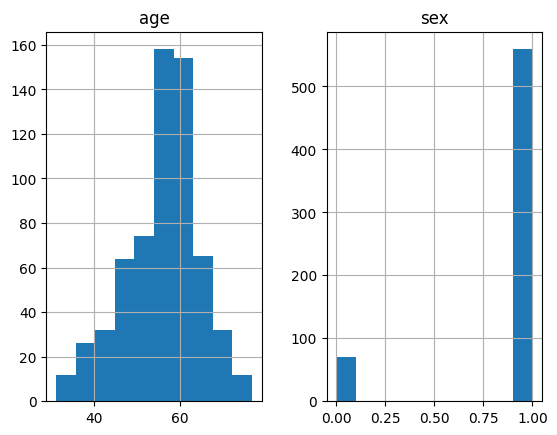

In [7]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
shape = df.shape
print("---------shape---------")
print(shape)

#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
print("---------missing entries----------")

desc = df.describe()


missing_entries = df.loc[:,[col for col in desc.columns if desc[col]['count'] < shape[0]]].copy()
if missing_entries.empty:
  print("no missing entries")
else:
  missing_entries.info()


#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
print("---------# of positive and negative---------")
print(f"number of positive cases: {len(df[df['oldpeak'] > 0.0])}")
print(f"number of negative cases: {len(df[df['oldpeak'] < 0.0])}")
#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################

print("--------------------- Plots --------------------------")
normal = df[df['target'] == 0]
heart_diseased = df[df['target'] == 1]

normal[['age','sex']].hist()
heart_diseased[['age','sex']].hist()








## Split Data ( 2 pt )
Before any action you should do this step to prevent from leak of data and using test data in your tunning pipeline

In [8]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################
test_ratio = 0.3
RANDOM_SEED = 42
X = df.loc[:,df.columns != 'target']
y = df['target']
X_train, X_test = train_test_split(X, test_size=test_ratio, random_state=RANDOM_SEED)
y_train, y_test = train_test_split(y, test_size=test_ratio, random_state=RANDOM_SEED)



## Feature Engineering:( 8 pt)
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.

In [9]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical fetures should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################

numeric_columns = ['age', 'resting bp s','cholesterol', 'max heart rate', 'oldpeak']
categorical_columns = X_train.columns.difference(numeric_columns)
X_train_rest = X_train.loc[:,categorical_columns]
X_test_rest = X_test.loc[:,categorical_columns]
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.loc[:,numeric_columns]), columns=numeric_columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test.loc[:,numeric_columns]), columns=numeric_columns)

X_train_scaled =  pd.concat([X_train_scaled, X_train_rest.reset_index()], axis=1).drop("index", axis='columns')
X_test_scaled =  pd.concat([X_test_scaled, X_test_rest.reset_index()], axis=1).drop("index", axis='columns')

print("X-------------")
print(X_train_scaled.head(10))
print(X_test_scaled.head(10))
#print(y_train)
#print(y_test)








#############################################################################
## TODO: just comment name of 2 other scaler form sklearn and write one paragraph for each:
## Your Comment:
# min_max_scaler - scale values to fit in [0,1] real number range by setting the
#                  min value to 0 and max value to 1. Just like StandardScaler, it is susceptible to
#                  outliers
# RodustScaler - similar to StandardScaler but uses median instead of mean. Has advantage over other
#                scalers when handling outliers
#
#
#
##################################################################################


X-------------
        age  resting bp s  cholesterol  max heart rate   oldpeak  ST slope  \
0 -1.566106     -0.757118     0.070043       -0.024287  0.288497         2   
1  0.877897      1.522053    -0.496223        0.176820  4.894054         3   
2  0.771636     -1.191245    -2.184727       -1.311377  1.025386         3   
3 -1.991150      0.328202    -0.300604        1.665018  0.472719         1   
4  1.090419      0.436733     1.264351        0.699701 -0.816837         1   
5 -0.290974     -0.105926     0.450986        0.337707 -0.356281         1   
6  0.027809      0.328202     0.636310       -1.432042  0.564830         2   
7  0.877897     -0.648586     0.080339       -2.196251 -0.816837         1   
8  0.877897     -0.648586     0.708380       -1.512485  0.472719         2   
9  0.771636     -0.105926     1.212872        1.142138 -0.816837         1   

   chest pain type  exercise angina  fasting blood sugar  resting ecg  sex  
0                4                0              

### plot correlations ( 2 pt)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='resting bp s', ylabel='age'>,
        <Axes: xlabel='cholesterol', ylabel='age'>,
        <Axes: xlabel='max heart rate', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='ST slope', ylabel='age'>,
        <Axes: xlabel='chest pain type', ylabel='age'>,
        <Axes: xlabel='exercise angina', ylabel='age'>,
        <Axes: xlabel='fasting blood sugar', ylabel='age'>,
        <Axes: xlabel='resting ecg', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='target', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='resting bp s'>,
        <Axes: xlabel='resting bp s', ylabel='resting bp s'>,
        <Axes: xlabel='cholesterol', ylabel='resting bp s'>,
        <Axes: xlabel='max heart rate', ylabel='resting bp s'>,
        <Axes: xlabel='oldpeak', ylabel='resting bp s'>,
        <Axes: xlabel='ST slope', ylabel='resting bp s'>,
        <Axes: xlabel='chest

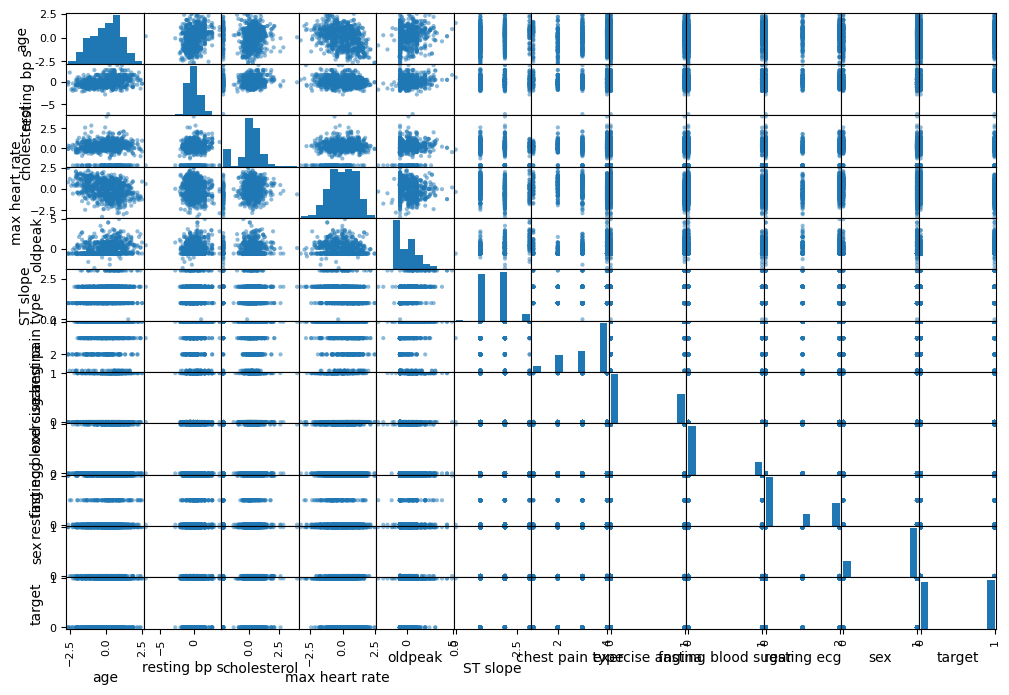

In [10]:
#############################################################################
## TODO: Make a temp dataframe with X_train and y_train.
## plot correlation between all features
#############################################################################



temp_train = pd.concat([X_train_scaled, pd.DataFrame(y_train, columns=['target']).reset_index()], axis=1)
temp_train = temp_train.drop("index", axis='columns')
#print(temp_train)
pd.plotting.scatter_matrix(temp_train, figsize=(12,8))


## Define a classification report function ( 3 pt)


In [11]:
#############################################################################
## TODO: Complete this function by considering function description
## Note: write every thing from scatch with python or numpy operators
#############################################################################

def classification_report(y_true, y_pred):


    """
    Calculate classification metrics based on true and predicted labels.

    Parameters:
    - y_true: Array of true labels (0 or 1).
    - y_pred: Array of predicted labels (0 or 1).

    Returns:
    - Accuracy: Ratio of correct predictions to total samples.
    - Precision: Accuracy of positive predictions among all predicted positives.
    - Recall: Ability to capture actual positives among all actual positives.
    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
    - FNR: Proportion of actual positives incorrectly predicted as negatives.
    """

################### Complete this part###############################
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    true_sample = len(y_true) + 0.0
    actual_positives = (y_true == 1).sum()
    false_negatives = [int(true == 1 and pred == 0) for (true, pred) in zip(y_true, y_pred)].count(1)

    Accuracy = [int(not(true^pred)) for (true, pred) in zip(y_true, y_pred)].count(1) / true_sample
    Precision = [int(not(true^pred) and pred == 1) for (true, pred) in zip(y_true, y_pred)].count(1) / ((y_pred == 1).sum() + 0.0)
    Recall = actual_positives / (actual_positives + false_negatives + 0.0)
    F1score = 2 * Precision * Recall / (Precision + Recall)
    FNR =  false_negatives / (actual_positives + 0.0)


####################################################################


    result = {
        'Accuracy:' : Accuracy,
        'Precision:' : Precision,
        'Recall:' : Recall,
        'F1score:': F1score,
        'FNR:': FNR

    }

    return result


# Test function





# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)





{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.6666666666666666, 'F1score:': 0.4444444444444444, 'FNR:': 0.5}


## Model Traning

### Covert data to numpy ( 2 pt)

In [12]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy array
#############################################################################

X_train_scaled_arr = np.array(X_train_scaled)
X_test_scaled_arr = np.array(X_test_scaled)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)



### Train Logistic Regression ( 5pt)

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8725490196078431, 'Recall:': 0.8903508771929824, 'F1score:': 0.8813600663446998, 'FNR:': 0.12315270935960591}


<Axes: >

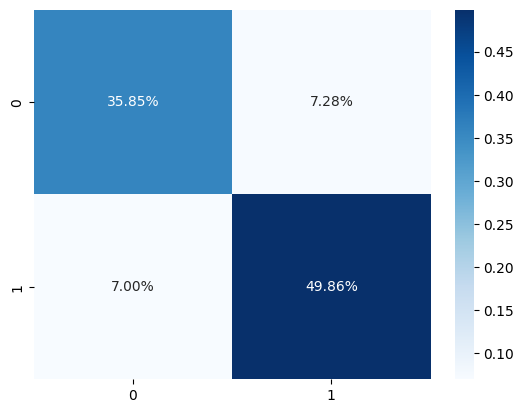

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################

log_reg = LogisticRegression(max_iter=400)
log_reg.fit(X_train_scaled_arr, y_train_arr)
y_pred = log_reg.predict(X_test_scaled_arr)
print(classification_report(y_test_arr, y_pred))
conf_mat = confusion_matrix(y_test_arr, y_pred)

sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')

### Train KNN ( 5pt)

{'Accuracy:': 0.8403361344537815, 'Precision:': 0.8443396226415094, 'Recall:': 0.8942731277533039, 'F1score:': 0.8685893222101376, 'FNR:': 0.11822660098522167}


<Axes: >

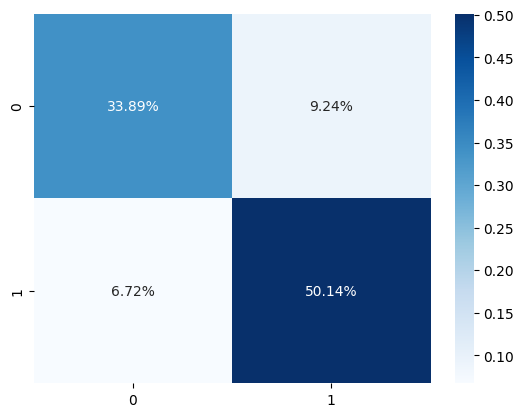

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_arr, y_train_arr)
y_pred = knn.predict(X_test_scaled_arr)
print(classification_report(y_test_arr, y_pred))
conf_mat = confusion_matrix(y_test_arr, y_pred)

sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')


### Train a safer model ( 3pt)

To make sure our model doesn't make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it's not as big of a problem and doctors will check it!

{'Accuracy:': 0.8487394957983193, 'Precision:': 0.8497652582159625, 'Recall:': 0.9022222222222223, 'F1score:': 0.8752084226573293, 'FNR:': 0.10837438423645321}


<Axes: >

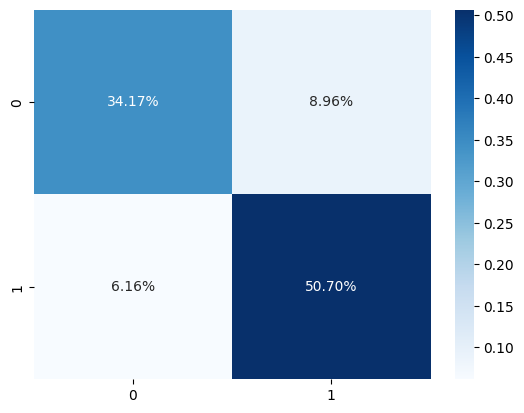

In [15]:
#############################################################################
## TODO: create a safer model with class_weight use your owen weight result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

#'age', 'resting bp s','cholesterol', 'max heart rate', 'oldpeak'

weight = {0:0.12, 1:0.15, 2:0.25, 3:0.31, 4:0.17}

log_reg = LogisticRegression(class_weight=weight, max_iter=400)
log_reg.fit(X_train_scaled_arr, y_train_arr)
y_pred = log_reg.predict(X_test_scaled_arr)
print(classification_report(y_test_arr, y_pred))
#print(accuracy_score(y_test, y_pred))

conf_mat = confusion_matrix(y_test_arr, y_pred)

sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')


### Cross Validation Score ( 5pt)

In [16]:
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
############################################################################

cv_result = cross_validate(knn, X_train_scaled_arr, y_train_arr, scoring=['accuracy', 'recall'] ,cv=6)
pd.DataFrame(cv_result)



,fit_time,score_time,test_accuracy,test_recall
0,0.002832,0.029809,0.884892,0.887324
1,0.002181,0.035496,0.841727,0.816901
2,0.001880,0.021453,0.841727,0.845070
3,0.001426,0.015012,0.812950,0.830986
4,0.001533,0.013439,0.841727,0.873239
5,0.001320,0.012777,0.811594,0.788732


### Hyperparameter Tuning Using GridSearchCV ( 5pt)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################

param_grid = {
    'n_neighbors':[3, 5, 10, 20, 25, 40],
    'weights':['uniform', 'distance'],
    'p':[1, 2]
}

gcv = GridSearchCV(knn, param_grid, scoring=['accuracy', 'recall'], refit='accuracy', cv=5)
gcv.fit(X_train_scaled_arr, y_train_arr)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20, 25, 40], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit='accuracy', scoring=['accuracy', 'recall'])

In [18]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################

print(gcv.best_estimator_)

KNeighborsClassifier(n_neighbors=25, p=1, weights='distance')


### Cross Validation Score on Result of Gride Search ( 2pt)

In [19]:
#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Gride Search
#############################################################################
cv_result = cross_validate(gcv.best_estimator_, X_train_scaled_arr, y_train_arr, scoring=['accuracy', 'recall'] ,cv=6)
pd.DataFrame(cv_result)


,fit_time,score_time,test_accuracy,test_recall
0,0.001938,0.033207,0.978417,0.985915
1,0.002357,0.024795,0.884892,0.887324
2,0.001941,0.014125,0.899281,0.915493
3,0.001991,0.017556,0.913669,0.887324
4,0.001990,0.011620,0.884892,0.915493
5,0.002021,0.023266,0.869565,0.830986


### Is the aforementioned KNN model (Best KNN) fair? ( 3 pt)
Evaluate that model perform equally on men and women or not.

In [20]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################

temp_test = pd.concat([X_test_scaled.reset_index().drop("index", axis='columns'), y_test.reset_index().drop("index", axis='columns')], axis=1)

temp_test_men = temp_test.loc[temp_test['sex']==1]
temp_test_women = temp_test.loc[temp_test['sex']==0]

X_test_men = temp_test_men.loc[:, temp_test_men.columns != 'target']
X_test_women = temp_test_women.loc[:, temp_test_women.columns != 'target']
y_test_men = temp_test_men['target']
y_test_women = temp_test_women['target']


y_pred_men = gcv.best_estimator_.predict(np.array(X_test_men))
y_pred_women = gcv.best_estimator_.predict(np.array(X_test_women))
print("for men-------------------")
print(classification_report(y_test_men, y_pred_men))
print("for women-----------------")
print(classification_report(y_test_women, y_pred_women))

#############################################################################
## TODO: write a comment and explain the result of this section in one paragraph.
## Why FNR in this dataset is important? And probably why this gap between men
## and women FNR happens
# Your Comment:
#   The False Negative in this particular case means the patient actually has
#   heart risk but the model predicts otherwise. The false impression given by
#   this model leads the patient to think he or she has no risk of heart
#   problem, and thus, the patient may lose the oppertunity to get necessary
#   treatment/cure before the risk indeed comes to happen.
#   It is shown that the women's FNR is higher than the men's in this situation.
#   One possible reason for this is that the number of samples for women is 1/4
#   of the men's which make the model to predict with insufficient number of samples.
#
#
#
#############################################################################

for men-------------------
{'Accuracy:': 0.9222614840989399, 'Precision:': 0.9405405405405406, 'Recall:': 0.9438775510204082, 'F1score:': 0.9422060911179734, 'FNR:': 0.05945945945945946}
for women-----------------
{'Accuracy:': 0.918918918918919, 'Precision:': 0.8, 'Recall:': 0.9, 'F1score:': 0.8470588235294118, 'FNR:': 0.1111111111111111}


### Ensemble Leanrning ( 10 pt)

First read the first part of this blog
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [34]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


#############################################################################
## TO-DO: Implement a Stacking Classifier Ensemble for Model Selection
## 1. Utilize a Logistic Regression, the best K-Neighbors Classifier,
##    Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
##    Random Forest, and Naive Bayes as base classifiers.
## 2. Designate a Logistic Regression as the Meta-Classifier.
## 3. Utilize 3-fold cross-validation for model evaluation.
## 4. Assess models' performance on the test set.
#############################################################################

log_reg = LogisticRegression(max_iter=400, random_state=RANDOM_SEED)
knn = gcv.best_estimator_
svm = SVC(random_state=RANDOM_SEED)
soft_margin = SVC(C=100, random_state=RANDOM_SEED)
dtc = DecisionTreeClassifier(random_state=RANDOM_SEED)
rf = RandomForestClassifier()
nb = GaussianNB()

models = [knn, svm, soft_margin, dtc, rf, nb]
labels = ['KNN', 'SVM', 'Soft_margin_SVM', 'Decision Tree','Random Forest', 'Naive Bayes']

SCVC = StackingCVClassifier(classifiers=models, meta_classifier=log_reg, random_state=RANDOM_SEED)
#models.append(SCVC)

for clf, label in zip(models, labels):

    scores = model_selection.cross_val_score(clf, X_train_scaled_arr, y_train_arr,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

scores = model_selection.cross_val_score(SCVC, X_train_scaled_arr, y_train_arr, cv=3, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'StackingCVClassifier'))

for clf, label in zip(models, labels):
    clf.fit(X_train_scaled_arr, y_train_arr)
    y_pred = clf.predict(X_test_scaled_arr)
    print("%s : %s" % (label.ljust(16), classification_report(y_test_arr, y_pred)))

SCVC.fit(X_train_scaled_arr, y_train_arr)
y_pred = SCVC.predict(X_test_scaled_arr)
print("%s : %s" % ('StackingCV'.ljust(16), classification_report(y_test_arr, y_pred)))







Accuracy: 0.89 (+/- 0.03) [KNN]
Accuracy: 0.83 (+/- 0.03) [SVM]
Accuracy: 0.84 (+/- 0.01) [Soft_margin_SVM]
Accuracy: 0.81 (+/- 0.01) [Decision Tree]
Accuracy: 0.89 (+/- 0.02) [Random Forest]
Accuracy: 0.83 (+/- 0.01) [Naive Bayes]
Accuracy: 0.89 (+/- 0.02) [StackingCVClassifier]
KNN              : {'Accuracy:': 0.9215686274509803, 'Precision:': 0.926829268292683, 'Recall:': 0.9398148148148148, 'F1score:': 0.933276873752344, 'FNR:': 0.06403940886699508}
SVM              : {'Accuracy:': 0.865546218487395, 'Precision:': 0.8672985781990521, 'Recall:': 0.9103139013452914, 'F1score:': 0.8882857894359293, 'FNR:': 0.09852216748768473}
Soft_margin_SVM  : {'Accuracy:': 0.8683473389355743, 'Precision:': 0.8979591836734694, 'Recall:': 0.8826086956521739, 'F1score:': 0.890217770468929, 'FNR:': 0.1330049261083744}
Decision Tree    : {'Accuracy:': 0.865546218487395, 'Precision:': 0.9015544041450777, 'Recall:': 0.875, 'F1score:': 0.8880787458986511, 'FNR:': 0.14285714285714285}
Random Forest    : {'A

### ROC ( 10 pt)
read about AUC ROC form this link:
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
and plot ROC Curve for ensembel model.

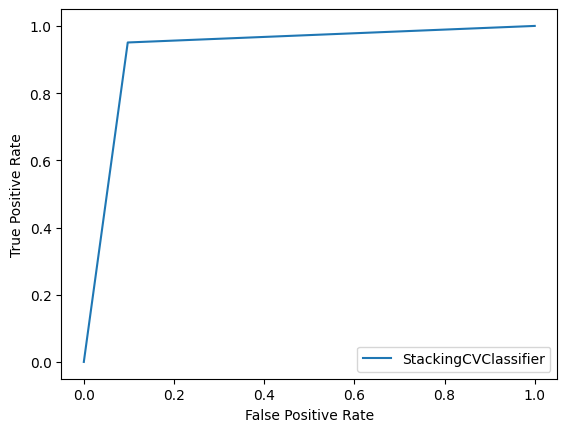

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

#############################################################################
## TODO: plot roc_curve for Ensemble model you created previously
#############################################################################

fpr, tpr, thresholds = roc_curve(y_test_arr, y_pred)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='StackingCVClassifier')
display.plot()
plt.show()




#############################################################################
## TODO: what this plot can show us that other metrics like Accuracy can't:
## Your Comment:
#   The plot can show us the correlation between precision and recall while
#   other metrics show only the number of correct positive and negative predictions
#
#
#
#
#
#############################################################################